# Ejercicio 1
Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la funcion de transferencia $H(z)$ de los siguientes sistemas LTI causales.

1. $y[n] - \frac{1}{2}y[n-1]+\frac{1}{4}y[n-2] = x[n]$
2. $y[n] = y[n-1] + y[n-2] + x[n-1]$
3. $y[n] = 7x[n] + 2y[n-1]-6y[n-2]$
4. $y[n] = \sum_{k=0}^72^{-k}x[n-k]$

=========================RESOLUCION=========================
1. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que 

$$ Y(z) - \frac{1}{2}Y(z)z^{-1} + \frac{1}{4}Y(z)z^{-2} = X(z) \\ 
    Y(z)[1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}] = X(z) \\
    H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}}$$

2. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z) = Y(z)z^{-1} + Y(z)z^{-2} + X(z)z^{-1}  \\ 
    Y(z) - Y(z)z^{-1} + Y(z)z^{-2} = X(z)z^{-1} \\ 
    Y(z)[1 - z^{-1} + z^{-2}] = X(z)z^{-1} \\ 
    H(z) = \frac{Y(z)}{X(z)} = \frac{z^{-1}}{1 - z^{-1} + z^{-2}}$$

3. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z) = 7X(z) + 2Y(z)z^{-1} - 6Y(z)z^{-2}  \\ 
    Y(z) - 2Y(z)z^{-1} + 6Y(z)z^{-2} = 7X(z) \\ 
    Y(z)[1-2z^{-1} + 6z^{-2}] = 7X(z) \\ 
    H(z) = \frac{Y(z)}{X(z)} = \frac{7}{1-2z^{-1} + 6z^{-2}}$$

4. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z)  = \sum_{k=0}^7 2^{-k}z^{-k}X(z) \\ 
    Y(z) = X(z) \sum_{k=0}^7 (2^{-1}z^{-1})^k \\ 
    Y(z) = X(z) \sum_{k=0}^7 (\frac{z^{-1}}{2})^k \\ 
    H(z) = \frac{Y(z)}{X(z)} = \sum_{k=0}^7 (\frac{z^{-1}}{2})^k$$

La transformada zeta nos permite convertir ecuaciones en diferencias (analogas a ecuaciones diferenciales del tiempo continuo) en expresiones algebraicas en el dominio Z. Esto simplifica la obtencion de la funcion de transferencia $H(z)$ que caracteriza completamente el comportamiento del sistema en frecuencia *(Como varia la salida en funcion de la frecuencia de la señal de entrada).*

En este ejercicio aplicamos la propiedad del desplazamiento en el tiempo de la transformada Z, que asocia cada retardo temporal con una multiplicacion por $z^{-k}$. Esta propiedad, junto con la linealidad de la transformada, permite obtener $H(z)$ como cociente de polinomios en $z^{-1}$, es decir: 
$$H(z) = \frac{Y(z)}{X(z)} = \frac{\text {Polinomio de Entrada}}{\text {Polinomio de Salida}}$$
Siendo esta representacion clave ya que nos permite analizar la respuesta en frecuencia, la estabilidad y el tipo de sistema (Causalidad, FIR, IIR)

# Ejercicio 2
Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relacion entre la transformada $Z$ y la Transformada de Fourier

## ¿Que es la respuesta en frecuencia?
Describe como el sistema afecta las distintas frecuencias de una señal de entrada. Es especialmente util para estudiar filtros digitales.
La respuesta en frecuencia se obtiene evaluando la funcion de transferencia $H(z)$ sobre el circulo unitario $\to H(e^{j \omega})$ donde: 
- $\omega$ es la frecuencia angular digital en radianes / muestra con $\omega \in [0,\pi]$
- $f$ es la frecuencia en Hz
- $\omega = \frac{2\pi f}{f_m}$ siendo $f_m$ la frecuencia de muestreo (10 Khz en este caso)

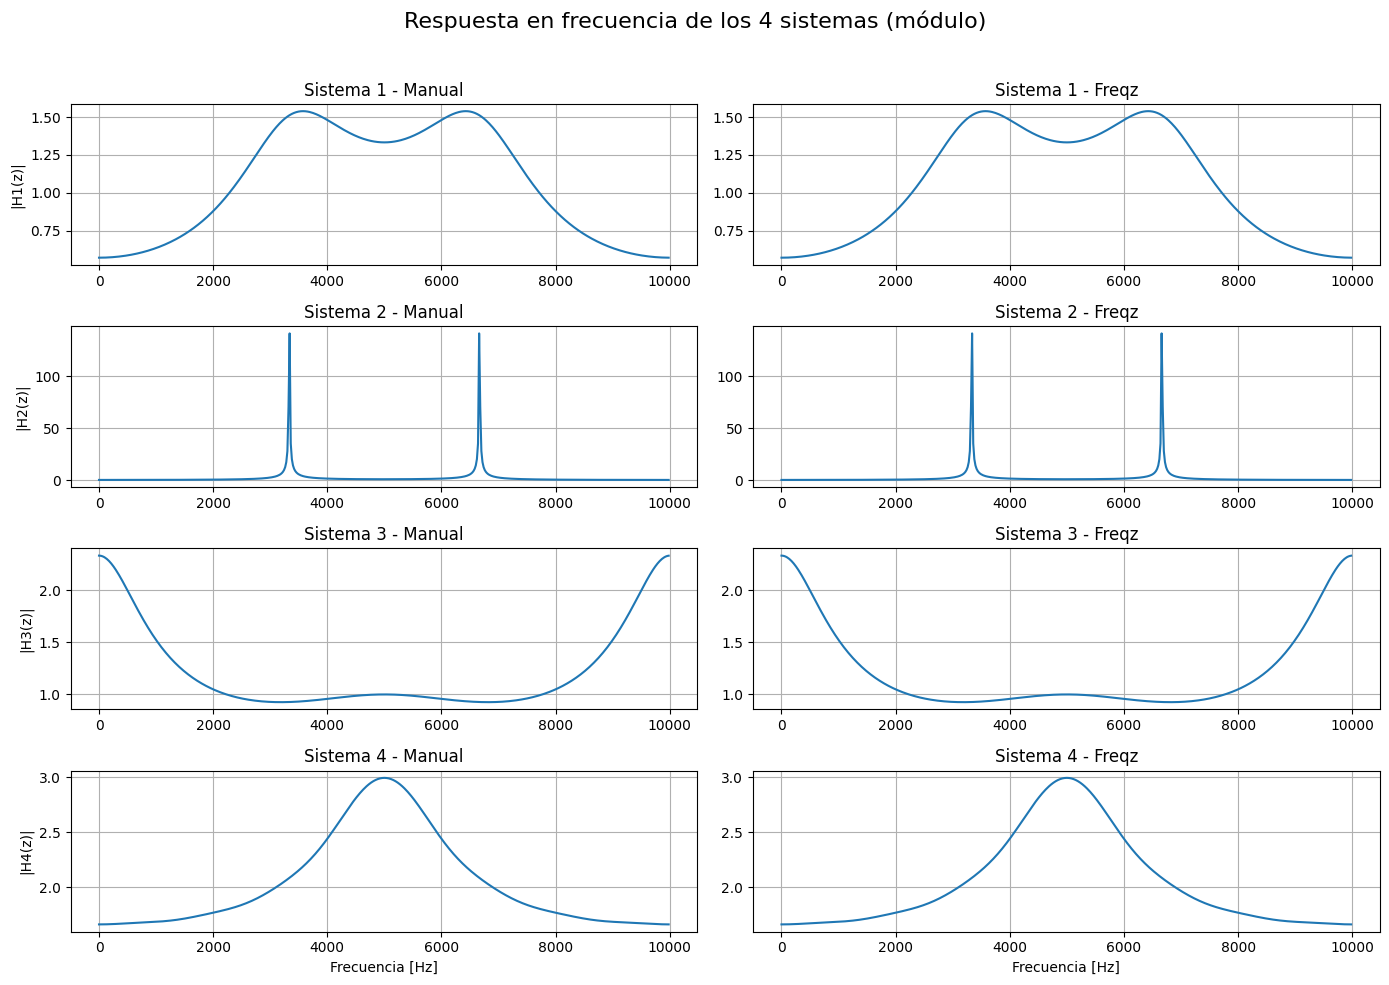

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

# ---------- Definición de funciones de transferencia H(z) ----------

# Sistema 1: H(z) = z^2 / (z^2 - (1/2)z + 1/4)
def H1(z):
    return (z**2) / (z**2 - (1/2)*z + 1/4)

# Sistema 2: H(z) = z / (z^2 - z + 1)
def H2(z):
    return z / (z**2 - z + 1)

# Sistema 3: H(z) = (7 * z^2) / (z^2 - 2z - 6)
def H3(z):
    return (7 * z**2) / (z**2 - 2*z - 6)

# Sistema 4: Serie finita de potencias de 1/(2z)
# H(z) = 2 + (1/(2z)) + (1/(2z))^2 + ... hasta 7 términos
# También devuelve los coeficientes para usar en freqz
def H4(z):
    H = 2                               # Término constante inicial
    coef = [2]                          # Lista de coeficientes para freqz (numerador)
    for i in range(7):                 # Suma de los términos restantes
        H += np.power(1/(2*z), i+1)    # Cálculo manual de cada término
        coef.append(np.power(1/2, i+1))# Coeficientes del numerador para freqz
    return H, coef

# ---------- Parámetros generales del análisis ----------

fm = 10000       # Frecuencia de muestreo en Hz
N = 512          # Número de puntos a evaluar sobre el círculo unitario

omega = np.linspace(0, 2*np.pi, N, endpoint=False)  # Vector de frecuencia angular ω ∈ [0, 2π)
frecs = np.linspace(0, fm, N, endpoint=False)       # Frecuencia en Hz correspondiente a cada ω
ejw = np.exp(1j * omega)                            # Vector z = e^{jω} para evaluar H(z) sobre el círculo unitario

# ---------- Configuración de los subplots para las gráficas ----------

fig, axs = plt.subplots(4, 2, figsize=(14, 10))     # Crea una figura con 4 filas y 2 columnas
fig.suptitle('Respuesta en frecuencia de los 4 sistemas (módulo)', fontsize=16)  # Título general del gráfico

# ---------- Sistema 1 ----------

# Evaluación manual: se evalúa H1 en z = e^{jω}
respuesta1 = np.abs(np.fft.fftshift(H1(ejw)))  

# Evaluación automática usando freqz (coeficientes del numerador y denominador)
w1, h1 = spy.freqz([0, 0, 1], [1/4, -1/2, 1], whole=True, worN=N)
respuesta1_freqz = np.abs(np.fft.fftshift(h1))     # Se toma el módulo de la respuesta

# Gráficas para el sistema 1
axs[0, 0].plot(frecs, respuesta1)
axs[0, 0].set_title("Sistema 1 - Manual")
axs[0, 0].set_ylabel("|H1(z)|")
axs[0, 0].grid()

axs[0, 1].plot(frecs, respuesta1_freqz)
axs[0, 1].set_title("Sistema 1 - Freqz")
axs[0, 1].grid()

# ---------- Sistema 2 ----------

respuesta2 = np.abs(np.fft.fftshift(H2(ejw)))
w2, h2 = spy.freqz([0, 1], [1, -1, 1], whole=True, worN=N)
respuesta2_freqz = np.abs(np.fft.fftshift(h2))

axs[1, 0].plot(frecs, respuesta2)
axs[1, 0].set_title("Sistema 2 - Manual")
axs[1, 0].set_ylabel("|H2(z)|")
axs[1, 0].grid()

axs[1, 1].plot(frecs, respuesta2_freqz)
axs[1, 1].set_title("Sistema 2 - Freqz")
axs[1, 1].grid()

# ---------- Sistema 3 ----------

respuesta3 = np.abs(np.fft.fftshift(H3(ejw)))
w3, h3 = spy.freqz([7], [1, -2, -6], whole=True, worN=N)
respuesta3_freqz = np.abs(np.fft.fftshift(h3))

axs[2, 0].plot(frecs, respuesta3)
axs[2, 0].set_title("Sistema 3 - Manual")
axs[2, 0].set_ylabel("|H3(z)|")
axs[2, 0].grid()

axs[2, 1].plot(frecs, respuesta3_freqz)
axs[2, 1].set_title("Sistema 3 - Freqz")
axs[2, 1].grid()

# ---------- Sistema 4 ----------

# Evaluación manual y obtención de coeficientes
respuesta4, coef = H4(ejw)
respuesta4 = np.abs(np.fft.fftshift(respuesta4))

# freqz con numerador = coeficientes calculados, denominador = 1 (FIR puro)
w4, h4 = spy.freqz(coef, [1], whole=True, worN=N)
respuesta4_freqz = np.abs(np.fft.fftshift(h4))

axs[3, 0].plot(frecs, respuesta4)
axs[3, 0].set_title("Sistema 4 - Manual")
axs[3, 0].set_ylabel("|H4(z)|")
axs[3, 0].grid()

axs[3, 1].plot(frecs, respuesta4_freqz)
axs[3, 1].set_title("Sistema 4 - Freqz")
axs[3, 1].grid()

# ---------- Etiquetas de eje X para los últimos gráficos ----------
for ax in axs[-1, :]:
    ax.set_xlabel("Frecuencia [Hz]")

# Ajustes finales y visualización
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el espacio entre los subplots y el título
plt.show()  # Muestra la figura completa

La respuesta en frecuencia de un sistema discreto la obtenemos evaluando la funcion de transferencia sobre el circulo unitario, es decir, haciendo $z = e^{j\omega T}$, donde T es el periodo de muestreo. Dado que se asume una frecuencia de muestreo de 10KHz, se puede relacionar la frecuencia angular $\omega$ con la frecuencia fisica $f$ (en Hz) mediante: 
$$\omega = 2 \pi \frac{f}{f_s}$$
Este analisis nos permite observar como el sistema amplifica o atenua diferentes componentes frecuenciales de la señal de entrada. Es especialmente util para determinar si el sistema actua como filtro pasa bajo, pasa alto, pasa banda o elimina banda.
La TZ proporciona asi una herramienta directa para estudiar el comportamiento espectral de sistemas discreto.

# Ejercicio 3
Considere el sistema
$$ H(z) = \frac{1 - 2z^{-1} + 2z^{-2} - z^{-3}}{(1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})}$$

1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
    *Un sistema discreto es estable si todos los polos estan dentro del circulo unitarios, es decir, si su modulo es menor que uno. En este caso hay un polo que esta SOBRE el circulo unitario, por lo tanto no es estable.*
2. Determine la respuesta al impulso del sistema.
    *La respuesta al impulso se obtiene aplicando la transformada inversa de Z, en este caso `dimpulse` lo hace directamente y muestra
    - Como responde el sistema ante una entrada impulso
    - Si crece, decae o se mantiene constante*


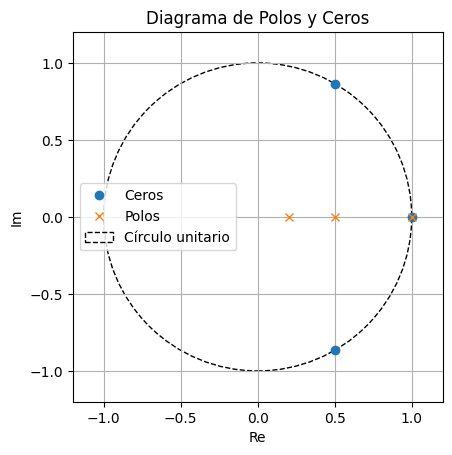

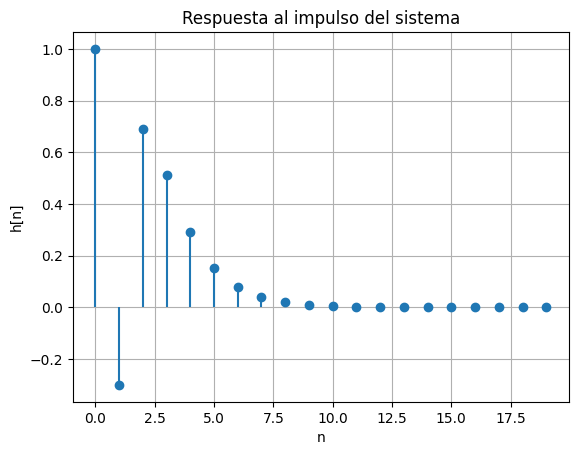

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Coeficientes del numerador y denominador de H(z)
# H(z) = (1 - 2z^{-1} + 2z^{-2} - z^{-3}) / ((1 - z^{-1})(1 - 0.5z^{-1})(1 - 0.2z^{-1}))
# Se representa como polinomios en z^(-1), por eso los coeficientes están ordenados en forma descendente
num = [1, -2, 2, -1]                    # Numerador: coeficientes de z^0 a z^{-3}
den = [1, -1.7, 0.8, -0.1]             # Denominador expandido como polinomio en z^{-1}

# ---------- Paso 1: Diagrama de Polos y Ceros ----------

# tf2zpk: Transforma función de transferencia (coeficientes) a ceros (z), polos (p) y ganancia (k)
z, p, _ = signal.tf2zpk(num, den)

# Creación del gráfico
fig, ax = plt.subplots()

# Se grafican los ceros (círculos) y los polos (cruces) en el plano complejo
ax.plot(np.real(z), np.imag(z), 'o', label='Ceros')  # Ceros con círculo
ax.plot(np.real(p), np.imag(p), 'x', label='Polos')  # Polos con cruz

# Se dibuja el círculo unitario (radio 1) para verificar estabilidad
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', label='Círculo unitario')
ax.add_artist(circle)

# Configuración de ejes y título
ax.set_xlabel('Re')                   # Eje real
ax.set_ylabel('Im')                   # Eje imaginario
ax.set_title('Diagrama de Polos y Ceros')
ax.grid()                             # Cuadrícula
ax.legend()                           # Leyenda
ax.set_aspect('equal')                # Escala igual en ambos ejes
ax.set_xlim(-1.2, 1.2)                # Límites del gráfico
ax.set_ylim(-1.2, 1.2)

# ---------- Paso 2: Respuesta al Impulso ----------

# dimpulse: calcula la respuesta al impulso del sistema (num, den, T=1), con n=20 muestras
n, h = signal.dimpulse((num, den, 1), n=20)

# h se devuelve como un array tridimensional, lo aplanamos para facilitar graficar
h = np.squeeze(h)

# Se grafica la respuesta al impulso como un diagrama de tallos (stem plot)
plt.figure()
plt.stem(n, h, basefmt=" ")           # basefmt=" " para evitar la línea horizontal en cero
plt.title("Respuesta al impulso del sistema")
plt.xlabel("n")                       # Eje de tiempo discreto
plt.ylabel("h[n]")                    # Valor de la respuesta
plt.grid()                            # Cuadrícula
plt.show()

Este ejercicio explora el analisis estructural de un sistema en el dominio Z, mediante su funcion de transferencia.
Los ceros del sistema se obtienen de las raices del numerador y los polos de las raices del denominador. Su representacion en el plano Z (diagrama de polos y ceros) permite determinar la estabilidad del sistema: Un sistema discreto es estable si todos sus polos estan dentro del circulo unitario.
Ademas, calculamos la respuesta al impulso, que representa la salida del sistema ante una entrada discreta delta de Kronecker. Este analisis nos va a permitir caracterizar completamente al sistema tanto desde el punto de vista temporal como frecuencial, siendo clave para su diseño o implementacion digital.

# Ejercicio 4
Considere el sistema continuo

$$ H(s) = \frac{12500 s}{44s^2 + 60625s + 62510^4} $$

y obtenga la funcion de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilizacion de transformaciones conformes de Euler y Bilineal. Para ello
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde cae 3dB respecto al valor maximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de muestreo cuatro veces superior a esta.
2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y comparelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes

No podriamos usar $z = \frac{ln(z)}{T}$ ya que nos queda en terminos no polinomiales por lo que hay que aplicar transformaciones conformes -> Bilineal y Euler.

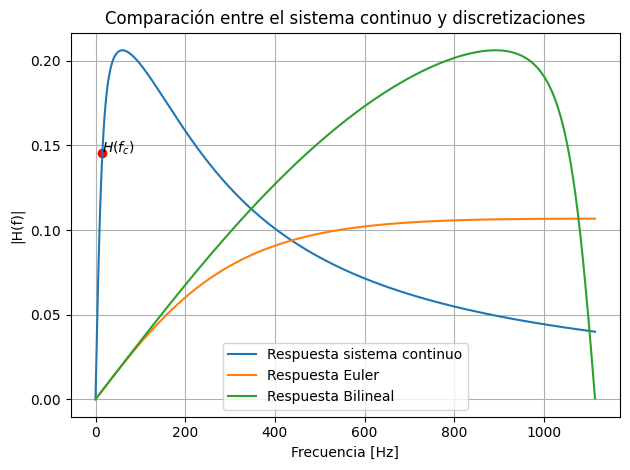

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

pi = np.pi

# ----------------------------------------
# Paso 0: Definición de variables
# ----------------------------------------

# Rango de frecuencias angulares ω en radianes por segundo (para el sistema continuo)
w = np.arange(0, 7000, 1)

# Convertimos ω a frecuencia en Hz usando f = ω / (2π)
frecuencias = w / (2 * pi)

# Definimos la variable compleja s para la transformada de Laplace (s = jω)
s = 1j * w

# Función de transferencia del sistema continuo H(s)
# H(s) = (12500 * s) / (44s² + 60625s + 625 * 10⁴)
H_s = (12500 * s) / (44 * s**2 + 60625 * s + 625 * 10**4)

# ----------------------------------------
# Paso 1: Cálculo de frecuencia de corte
# ----------------------------------------

# Se define como la frecuencia donde la magnitud cae a 1/√2 ≈ 0.707 del valor máximo (equivale a -3 dB)
# Buscamos el índice donde esto ocurre (con una tolerancia de 1e-3)
indiceFc = np.where(np.isclose(np.abs(H_s), max(np.abs(H_s)) / np.sqrt(2), atol=1e-3))[0][0]

# Extraemos la frecuencia de corte en Hz
fc = frecuencias[indiceFc]

# ----------------------------------------
# Paso 2: Definir frecuencia de muestreo
# ----------------------------------------

# Para evitar aliasing, tomamos fm = 4 * fc (cuatro veces la frecuencia de corte)
fm = 4 * fc

# Calculamos el período de muestreo T = 1 / fm
T = 1 / fm

# ----------------------------------------
# Paso 3: Aplicar transformaciones conformes
# ----------------------------------------

# Definimos el eje de frecuencias digitales ω ∈ [0, π]
omega = np.arange(0, pi, pi / len(w))

# Variable compleja z = e^{jω} (usada para representar frecuencia digital)
z = np.exp(1j * omega)

# ---------- Transformación Bilineal ----------
# Sustituimos s por: s = (2/T) * (1 - z⁻¹) / (1 + z⁻¹)
s_bilineal = (2 / T) * (1 - 1 / z) / (1 + 1 / z)

# Evaluamos H(s) en s_bilineal → obtenemos H(z) con transformación bilineal
H_bilineal = (12500 * s_bilineal) / (44 * s_bilineal**2 + 60625 * s_bilineal + 625 * 10**4)

# ---------- Transformación de Euler (hacia atrás) ----------
# Sustituimos s por: s = (1 - z⁻¹) / T
s_euler = (1 - 1 / z) / T

# Evaluamos H(s) en s_euler → obtenemos H(z) con transformación de Euler hacia atrás
H_euler = (12500 * s_euler) / (44 * s_euler**2 + 60625 * s_euler + 625 * 10**4)

# ----------------------------------------
# Paso 4: Graficar las respuestas en frecuencia
# ----------------------------------------

# Dibujamos la magnitud de las tres respuestas:
# - Sistema continuo H(s)
# - Sistema discretizado con Euler
# - Sistema discretizado con bilineal

plt.plot(frecuencias, np.abs(H_s), label='Respuesta sistema continuo')
plt.plot(frecuencias, np.abs(H_euler), label='Respuesta Euler')
plt.plot(frecuencias, np.abs(H_bilineal), label='Respuesta Bilineal')

# Marcamos la frecuencia de corte encontrada en H(s)
plt.scatter(frecuencias[indiceFc], np.abs(H_s[indiceFc]), color='red')
plt.annotate('$H(f_c)$', (fc, np.abs(H_s[indiceFc])))

# Etiquetas y decoración del gráfico
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(f)|')
plt.title('Comparación entre el sistema continuo y discretizaciones')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Se realiza la discretizacion de un sistema continuo cuya funcion de transferencia viene en el dominio $s$
Para pasar al discreto empleamos dos transformaciones conformesÑ 
1. Euler: Simple pero puede introducir distorsiones significativas en frecuencia.
2. Bilineal: Mapea el eje imaginario de $s$ en el circulo unitario del plano $z$ preservando la estabilidad del sistema.

Se estima primero la frecuencia de corte, es decir, la frecuencia donde la magnitud de $H(s)$ cae 3dB respecto del maximo, y luego se define una frecuencia de muestreo 4 veces superior, como criterio de sobredimensionamiento para evitar aliasing y asegurar fidelidad en la discretizacion.

Posteriormente comparamos las respuestas en frecuencia de los sistemas disfretos obtenidos con la original en tiempo continuo. Esta comparacion nos permite evaluar cual de las dos transformaciones reproduce mejor el comportamiento original y si la frecuencia de muestreo es suficiente para capturar adecuadamente las caracteristicas espectrales del sistema continuo.